<img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Allen Decoding Tutorial SWDB 2017 </h1> 
<h3 align="center">Monday, August 28, 2017</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>This notebook will introduce you to the supervised learning (decoding) using the scikit-learn package. Here we have data from different groups (classes), and we aim to use features of that data to predict which class data were drawn from.

<p>We will start by simulating data from two Gaussian distributions.

</div>

In [102]:
# import some stuff to get started

import numpy as np
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1:**  Define the two distributions we will draw simulate data from. These are the ``classes''.
</div>

In [103]:
mu1 = np.array([2., 5.])
mu2 = np.array([3., 4.])

cov1 = np.array([[1., -.5], [-.5, 1.]])
cov2 = np.array([[5., 1.], [1., 5.]])

cov1inv = np.linalg.inv(cov1)
cov2inv = np.linalg.inv(cov2)

print(cov1)
print(cov2)

[[ 1.  -0.5]
 [-0.5  1. ]]
[[ 5.  1.]
 [ 1.  5.]]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 2:**  Visualize the distributions of the data from each class.
</div>

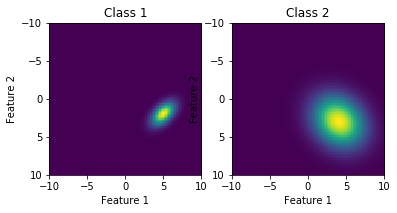

In [104]:
Nmesh = 100
x_plot = np.linspace(-10., 10., Nmesh)
gauss1 = np.zeros((Nmesh, Nmesh))
gauss2 = np.zeros((Nmesh, Nmesh))

for i in range(Nmesh):
    for j in range(Nmesh):
        Xplot = np.array([x_plot[i], x_plot[j]])
        gauss1[i, j] = np.exp(-.5*(Xplot - mu1).dot(cov1inv).dot((Xplot - mu1).T))
        gauss2[i, j] = np.exp(-.5*(Xplot - mu2).dot(cov2inv).dot((Xplot - mu2).T))

gauss1 = gauss1 / np.sqrt(2 * np.pi * np.linalg.det(cov1))
gauss2 = gauss2 / np.sqrt(2 * np.pi * np.linalg.det(cov2))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(gauss1, extent=(-10, 10, 10, -10)); 
ax[0].set_title('Class 1')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

ax[1].imshow(gauss2, extent=(-10, 10, 10, -10)); 
ax[1].set_title('Class 2')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1:**  Sample 1000 data points, 500 from each class. Place them in in a single array. Hint: check np.random for sampling routines. It will be convenient later if you arrange your data array to alternate elements of the two classes.
</div>

In [105]:
X1 = np.random.multivariate_normal(mu1, cov1, size=500)
X2 = np.random.multivariate_normal(mu2, cov2, size=500)
X = np.zeros((1000, 2))
X[::2] = X1
X[1::2] = X2

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2:**  Create class labels for your data: a vector where each element labels the corresponding element of your data array.
</div>

In [126]:
Y = np.zeros((1000))
Y[::2] = 0.
Y[1::2] = 1.
print(Y.shape)
print(np.unique(Y))

(1000,)
[ 0.  1.]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p> We have the advantage of knowing that our simulated data are from Gaussian distributions, so we will begin Gaussian discriminant analysis (aka quadratic discriminant analysis). This classifier takes into account that the classes are defined by Gaussian distributions, each with their own mean and covariance matrix. The likelihood ratio test for whether a sample was drawn from one class or the other then yields a quadratic discrimination boundary.
</div>

In [107]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 3**  What methods does the classifier have?
</div>

In [108]:
help(QDA)

Help on QuadraticDiscriminantAnalysis in module sklearn.discriminant_analysis object:

class QuadraticDiscriminantAnalysis(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
 |  Quadratic Discriminant Analysis
 |  
 |  A classifier with a quadratic decision boundary, generated
 |  by fitting class conditional densities to the data
 |  and using Bayes' rule.
 |  
 |  The model fits a Gaussian density to each class.
 |  
 |  .. versionadded:: 0.17
 |     *QuadraticDiscriminantAnalysis*
 |  
 |  Read more in the :ref:`User Guide <lda_qda>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array, optional, shape = [n_classes]
 |      Priors on classes
 |  
 |  reg_param : float, optional
 |      Regularizes the covariance estimate as
 |      ``(1-reg_param)*Sigma + reg_param*np.eye(n_features)``
 |  
 |  store_covariance : boolean
 |      If True the covariance matrices are computed and stored in the
 |      `self.covariance_` attribute.
 |  
 |      .. versionadded:: 0.17
 |  
 |  t

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3:**  Train (fit) your classifier! To start with, use just 10 data points to train with. For the gaussian discriminant, ``training" means choosing data to use for training, and computing the sample means and covariances. You could do this by hand, but scikit-learn's decoders provide a handy method. Print the classifier's score on the training data.

In [109]:
QDA.fit(X[:5], Y[:5])
print('training score: ' + str(QDA.score(X[:10], Y[:10])))

training score: 0.7


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 4:**  Write a function to visualize the decision boundary for your trained classifier. To do this, visualize the feature space, and predict the label for each point in it. Hint: check out np.meshgrid in order to create data points that span a space, and then try flattening and concatenating the results to feed to the classifier.
</div>

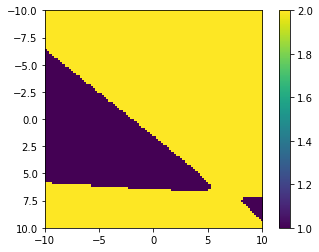

In [120]:
def decision_surface2d(x, y, classifier):
    
    xx, yy = np.meshgrid(x, y)
    X =(np.c_[xx.ravel(), yy.ravel()])
    
    return classifier.predict(X).reshape(xx.shape)

x_plot = np.linspace(-10, 10, 100)
plt.figure()
plt.imshow(decision_surface2d(x_plot, x_plot, QDA), interpolation='none', extent=(-10, 10, 10, -10))
plt.colorbar()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 5:**  How does the decision surface of the classifier evolve as you add training points? Add a single training point at a time and plot the decision surface from ~4 to ~10 training points. On each plot, also show the training data
</div>

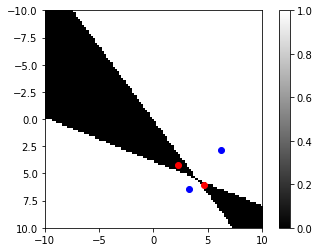

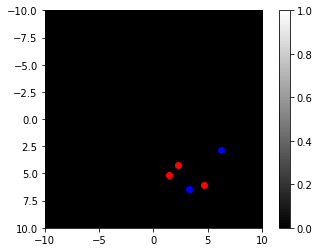

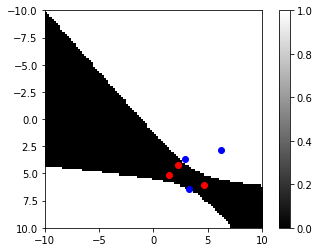

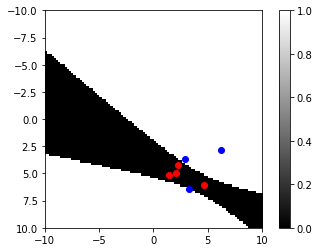

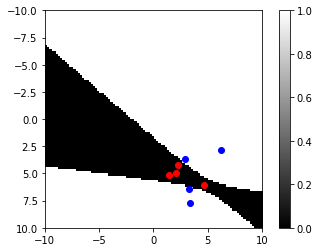

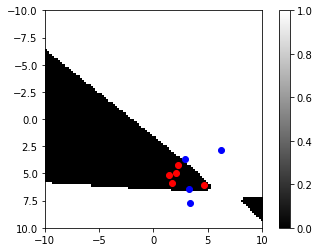

In [129]:
num_points = range(4, 10)
data_colors = ['r', 'b']

for num in num_points:
    QDA.fit(X[:num], Y[:num])

    plt.figure()
    plt.imshow(decision_surface2d(x_plot, x_plot, QDA), interpolation='none', extent=(-10, 10, 10, -10), cmap='gray', clim=(0, 1))
    plt.colorbar()
    
    for x in range(num):
        
        plt.plot(X[x, 0], X[x, 1], 'o', color=data_colors[int(Y[x])])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF;">

<p>In order to avoid over-fitting, we should evaluate our classifier on different data than we used to train it. This is called cross-validation. If we have a data set of K points, we can hold out a fraction of our data to use as testing data. The classifier's ability to generalize shows us how it can learn the class distributions, rather than the training data.

In [112]:
from sklearn.model_selection import KFold, LeaveOneOut
# check sklearn.cross_validation if your version doesn't have cross_validation

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 4**  What methods do scikit-learn's KFold and LeaveOneOut have? What other types of cross-validation scheme live in sklearn.model_selection?
</div>

In [113]:
help(KFold)

Help on class KFold in module sklearn.model_selection._split:

class KFold(_BaseKFold)
 |  K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets. Split
 |  dataset into k consecutive folds (without shuffling by default).
 |  
 |  Each fold is then used once as a validation while the k - 1 remaining
 |  folds form the training set.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle the data before splitting into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState instance, random_state is the random number generator;
 |      If None, the random number generator is the RandomState instance used
 |      by `np.random`. Used when

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 6:**  Reserve one-fifth of your data to use as testing data. Train the classifier with your train data and evaluate on the test data. Then repeat so that each fifth of the data gets used as a separate test set. What are the training and test scores on each fold?
</div>

In [117]:
kf = KFold(n_splits=5)

for train, test in kf.split(X):
    QDA.fit(X[train], Y[train])
    print('training score: '+str(QDA.score(X[train], Y[train])))
    print('test score: '+str(QDA.score(X[test], Y[test])))

training score: 0.81875
test score: 0.79
training score: 0.81
test score: 0.83
training score: 0.815
test score: 0.805
training score: 0.82125
test score: 0.79
training score: 0.80625
test score: 0.85


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 7:**  Train your classifier with increasing amounts of training data, and test it on held-out data. How do the training and test performances depend on the number of training points? The training and test scores as a function of number of training points are called a learning curve. Hint: check sklearn.learning_curve or sklearn.model_selection for useful functions.
</div>

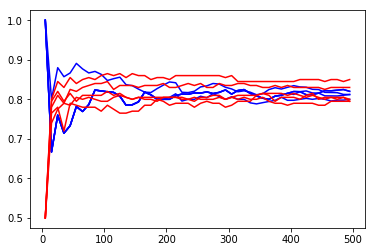

In [130]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(QDA, X, Y, cv=5, train_sizes=range(5, num_total/2, 10))
plt.figure()
plt.plot(train_sizes, train_scores, 'b', train_sizes, valid_scores, 'r')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Here we've given ourselves lots and lots of very low-dimensional data. This is often not the situation we are in; we often have high-dimensional data in limited amounts. Let's see how our classifier performs in this situation.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 5**  Generate a new, high-dimensional data set from two classes of Gaussian data.
</div>

In [131]:
N = 100
mu1 = np.random.rand(N)
mu2 = np.random.rand(N)

cov1 = np.random.randn(100, 100)
cov1 = cov1.dot(cov1.T)

cov2 = np.random.randn(100, 100)
cov2 = cov2.dot(cov2.T)

In [132]:
num_total = 1000
X1 = np.random.multivariate_normal(mu1, cov1, size=num_total/2)
X2 = np.random.multivariate_normal(mu2, cov2, size=num_total/2)
XX = np.zeros((num_total, N))
XX[::2] = X1
XX[1::2] = X2

YY = np.zeros((num_total))
YY[::2] = 0.
YY[1::2] = 1.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 8:**  Plot the learning curve for the quadratic discriminant on the high-dimensional dataset.
</div>

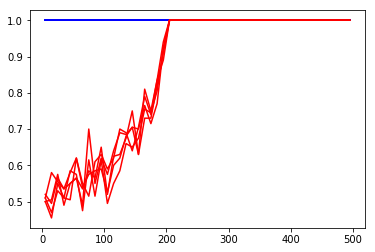

In [70]:
train_sizes, train_scores, valid_scores = learning_curve(QDA, XX, YY, cv=5, train_sizes=range(5, num_total/2, 10))
plt.figure()
plt.plot(train_sizes, train_scores, 'b', train_sizes, valid_scores, 'r')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The quadratic discriminant has so many parameters that for small enough amounts of data, it can yield perfect performance on training data but score poorly on test data. If we do not have enough data to train our classifier well, we can instead try to reduce the number of its parameters; to regularize it. 

<p>For the quadratic discriminant, one way to do this is to make additional assumptions about the form of the data. For example, we could assume that our two classes have different means but the same covariance matrix. This yields Linear Discriminant Analysis (LDA).

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 9:**  Compute the learning curve for the linear discriminant. Compare it to the quadratic discriminant, for both low- and high-dimensional data.
</div>

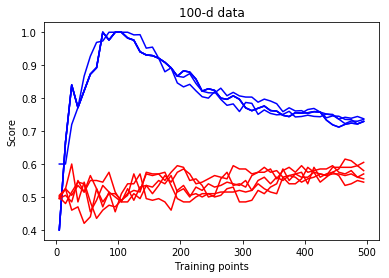

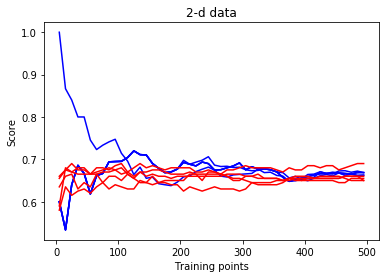

In [134]:
train_sizes, train_scores, valid_scores = learning_curve(LDA, XX, YY, cv=5, train_sizes=range(5, num_total/2, 10))
plt.figure()
plt.plot(train_sizes, train_scores, 'b', train_sizes, valid_scores, 'r')
plt.title('100-d data')
plt.xlabel('Training points')
plt.ylabel('Score')

train_sizes, train_scores, valid_scores = learning_curve(LDA, X, Y, cv=5, train_sizes=range(5, num_total/2, 10))
plt.figure()
plt.plot(train_sizes, train_scores, 'b', train_sizes, valid_scores, 'r')
plt.title('2-d data')
plt.xlabel('Training points')
plt.ylabel('Score')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Instead of assuming that our different classes share a covariance matrix, we could instead assume that the different features are uncorrelated within each class. If we assume that the classes all share a covariance matrix, this gives us LDA with a diagonal covariance. Otherwise, we obtain the ``Naive Bayes'' classifier.

In [74]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 10:**  Compute the learning curve for the Naive Bayes classifier for both the low- and high-dimensional data.
</div>

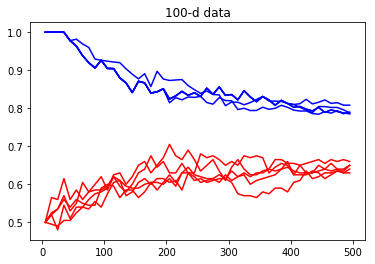

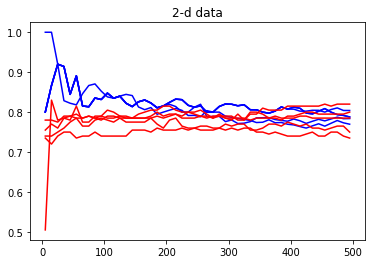

In [75]:
train_sizes, train_scores, valid_scores = learning_curve(NB, XX, YY, cv=5, train_sizes=range(5, num_total/2, 10))
plt.figure()
plt.plot(train_sizes, train_scores, 'b', train_sizes, valid_scores, 'r')
plt.title('100-d data')
plt.xlabel('Training points')
plt.ylabel('Score')

train_sizes, train_scores, valid_scores = learning_curve(NB, X, Y, cv=5, train_sizes=range(5, num_total/2, 10))
plt.figure()
plt.plot(train_sizes, train_scores, 'b', train_sizes, valid_scores, 'r')
plt.title('2-d data')
plt.xlabel('Training points')
plt.ylabel('Score')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Above we used decoders that relied on the assumption that the data were drawn from Gaussian distributions. If this is not the case, we can still use these decoders but they might not perform as expected. They are examples of parametric decoders: they fit a parameterized distribution (here, Gaussians) to the training data and that distribution determines the test classifications.

<p> There are also non-parametric decoders, that do not rely on fitting a parametric model for the data. Perhaps the simplest such is the K-Neighbors classifier. This classifies test points based on majority vote among the labels of the K nearest training points.
</div>

In [77]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 6:**  What methods and parameters does the K Nearest Neighbors classifier have?
</div>

In [ ]:
help(KNN)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 11:**  Compare learning curves for the K Nearest Neighbors classifier using 5 neighbors and 100 neighbors.
</div>

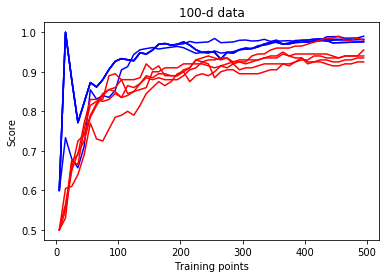

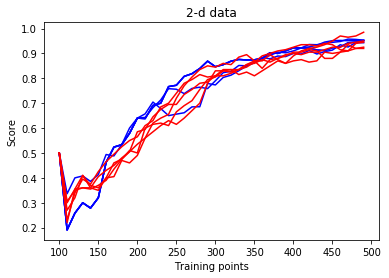

In [137]:
KNN5 = KNeighborsClassifier(n_neighbors=5)
KNN100 = KNeighborsClassifier(n_neighbors=100)

train_sizes, train_scores, valid_scores = learning_curve(KNN5, XX, YY, cv=5, train_sizes=range(5, num_total/2, 10))
plt.figure()
plt.plot(train_sizes, train_scores, 'b', train_sizes, valid_scores, 'r')
plt.title('100-d data')
plt.xlabel('Training points')
plt.ylabel('Score')

train_sizes, train_scores, valid_scores = learning_curve(KNN100, XX, YY, cv=5, train_sizes=range(100, num_total/2, 10))
plt.figure()
plt.plot(train_sizes, train_scores, 'b', train_sizes, valid_scores, 'r')
plt.title('2-d data')
plt.xlabel('Training points')
plt.ylabel('Score')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> How do we choose how many neighbors to use? We don't want to use our test data - that defeats the purpose of it. But if we use just the training data, then we risk overfitting within each training fold.

<p> A principled way is to use nested cross-validation. By nested cross-validation. Within each training fold, we will do another round of cross-validation to choose how many neighbors to use. Ie, we will split each outer training fold into an inner training fold and inner validation fold. On each outer training fold, we will do a round of cross-validation where we split that training fold into inner training and inner validation sets, evaluate each potential parameter value on them, and choose the parameter value with the best inner validation score. We then test the classifier, with that parameter value, on the outer test fold. 

<p> So each training fold will have its own value for n_neighbors. Some variation between these hyperparameters across training folds is natural, but if they are wildly different something's probably going on.
</div>

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as ke

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 12**: Train your K-Neighbors classifier using 5-fold cross-validation. In each training fold, perform a second, inner round of 5-fold cross-validation with different numbers of neighbors. For the outer training fold, choose the number of neighbors with the best validation score from the inner cross-validation; use it to compute the test score. Hint: check sklearn.model_selection.GridSearchCV for a handy function to use in the inner loop.

<p> Do this for the low-dimensional dataset and the high-dimensional dataset. How many neighbors are optimal for each?
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Further exercises</h2>
<p>Here are some further exercises:

<li> Compare the KFold and StratifiedKFold cross-validation schemes.
<li> Compare the Naive Bayesian and diagonal LDA decoders with low and high-dimensional data. To implement diagonal LDA, check the parameters of the classifier.
<li> Implement scikit-learn's Logistic Regression. It has a parameter that weights regularization of its trained weights. How should you choose that parameter? Hint: what did we do for K Neighbors?
<li> Compare the performance of Logistic Regression and a Support Vector Machine on the simulated low- and high-dimensional data.
<li> In the examples above, we have equal amounts of data from each class. If we don't, what should we measure chance performance relative to? Try shuffling the class labels and training the different classifiers on shuffled data.
<li> Use neural responses from the brain observatory to predict which stimulus was on the screen.
<li> Use information about anatomical projections from a brain region to predict projections to it, or vice versa.
<li> Use information about electrophysiological response properties of different cre lines to predict the genetic identity of test cells.
</div>